# TensorFlow识别MNIST手写数据集

## 通过TensorFlow识别mnist数据，与前面的相似，知识前面的使用Keras语句来执行，这次使用TensorFlow语句执行，两种方式相似，但是又有不同

In [1]:
import tensorflow as tf

F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\python\Anaconda3\envs\tensorFLow-gpu\lib\site-packages\ten

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [5]:
"""
第一次执行会下载数据
"""
mnist = input_data.read_data_sets('data/', one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [6]:
"""
查看mnist数据集
"""
print('train: ', mnist.train.num_examples)
print('validation: ', mnist.validation.num_examples)
print('test: ', mnist.test.num_examples)

train:  55000
validation:  5000
test:  10000


## 查看训练数据

### 训练数据是由images和labels组成的

In [7]:
print('train images: ', mnist.train.images.shape)
print('labels: ', mnist.train.labels.shape)

train images:  (55000, 784)
labels:  (55000, 10)


In [13]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
"""
查看第0项images的长度
"""
len(mnist.train.images[0])

784

In [15]:
"""
查看第0项images的内容
"""
mnist.train.images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

#### 可以看出TensorFlow已经把数据进行了标准化

In [16]:
"""
定义plot_image显示图像
"""
import matplotlib.pyplot as plt
def plot_image(image):
    """
    传入参数image本来有728个点，使用reshape转换为28*28的图形
    """
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()

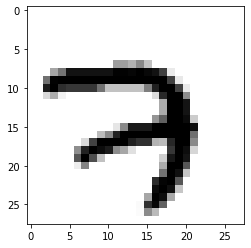

In [17]:
# 画出图像
plot_image(mnist.train.images[0])

In [19]:
"""
因为前面指定了one-hot=True,因此显示的值是如下的格式
"""
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [20]:
"""
使用argmax显示数字,
"""
import numpy as np
np.argmax(mnist.train.labels[0])

7

## 查看多项数据images和labels

In [27]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, i+1)
        ax.imshow(np.reshape(images[idx], (28, 28)),cmap='binary')
        title = 'label='+ str(np.argmax(labels[idx]))
        if len(prediction) >0:
            title += ', predict='+ str(prediction[idx])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

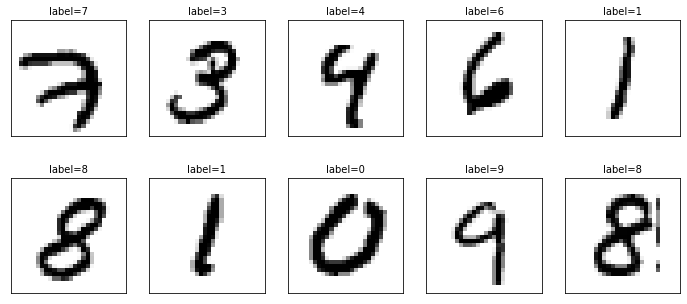

In [28]:
"""
查看训练集前10项图片数据
"""
plot_images_labels_prediction(mnist.train.images, mnist.train.labels, [], 0)

validation images:  (5000, 784)
validation labels:  (5000, 10)


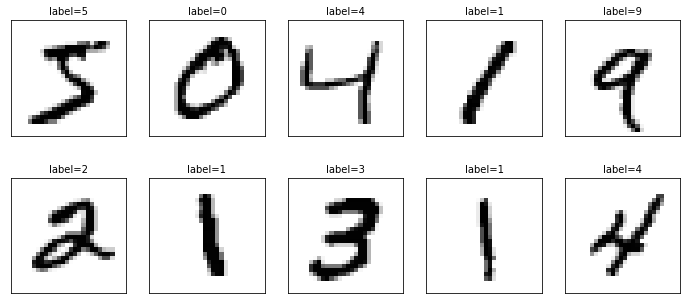

In [30]:
"""
查看验证集前10项图片数据
"""
print('validation images: ', mnist.validation.images.shape)
print('validation labels: ', mnist.validation.labels.shape)
plot_images_labels_prediction(mnist.validation.images, mnist.validation.labels, [], 0)

test images:  (10000, 784)
test labels:  (10000, 10)


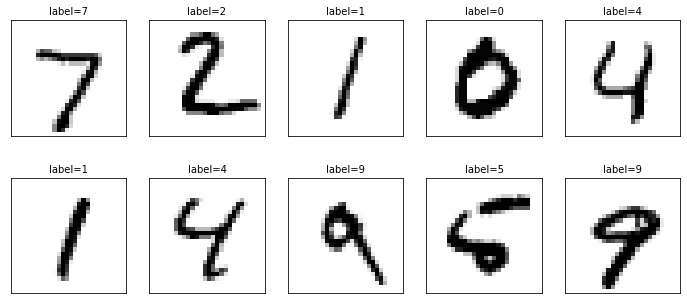

In [31]:
"""
查看测试数据集
"""
print('test images: ', mnist.test.images.shape)
print('test labels: ', mnist.test.labels.shape)
plot_images_labels_prediction(mnist.test.images, mnist.test.labels, [], 0)

## 批次读取MNIST数据

### 进行深度学习网络的训练时，每次训练并不是读取全部的数据进行训练，而是分批次读取数据（例如读取前100项），在TensorFlow中已经提供了方法， mnist.train.next_batch

In [32]:
"""
读取批次数据
"""
batch_image_xs, batch_label_ys = mnist.train.next_batch(batch_size=100)

In [35]:
"""
查看批次数据
"""
print('len: ', len(batch_image_xs), ', shape:', batch_image_xs.shape)
print('len: ', len(batch_label_ys), ', shape: ', batch_label_ys.shape)

len:  100 , shape: (100, 784)
len:  100 , shape:  (100, 10)


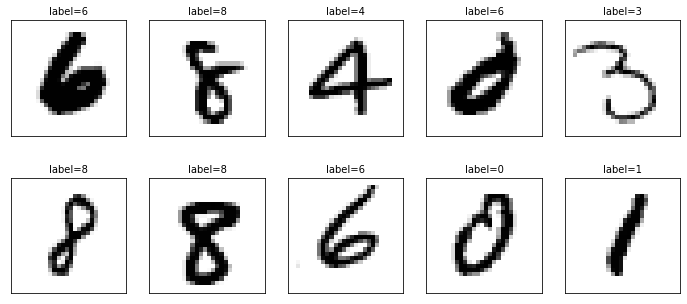

In [36]:
"""
查看批次训练数据的前10项数据
"""
plot_images_labels_prediction(batch_image_xs, batch_label_ys, [], 0)